In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("diabetes.csv")  # Replace with your data source

# Stratified sampling to get 100 rows
reduced_data = data.groupby('Outcome', group_keys=False).apply(
    lambda x: x.sample(frac=100/768, random_state=42)
)

# Ensure exact 100 rows (adjust proportions if needed)
reduced_data = reduced_data.sample(n=100, random_state=42)

# Save to a new file
reduced_data.to_csv("diabetes_100_rows.csv", index=False)

C:\Users\Kiran\AppData\Local\Temp\ipykernel_13116\375781360.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  reduced_data = data.groupby('Outcome', group_keys=False).apply(


In [4]:
import pandas as pd
import numpy as np

# Assuming the data is stored in a CSV file named 'data.csv'
df = pd.read_csv('diabetes_100_rows.csv')

print(df)

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             1      128             98             41       58  32.0   
1             0      125             68              0        0  24.7   
2             3      173             84             33      474  35.7   
3             2      107             74             30      100  33.6   
4             2       84              0              0        0   0.0   
..          ...      ...            ...            ...      ...   ...   
95            2       88             58             26       16  28.4   
96            0      162             76             36        0  49.6   
97            4      154             72             29      126  31.3   
98            1       88             30             42       99  55.0   
99            0      161             50              0        0  21.9   

    DiabetesPedigreeFunction  Age  Outcome  
0                      1.321   33        1  
1                      0.206   21


Data Summary Before Processing:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
mi

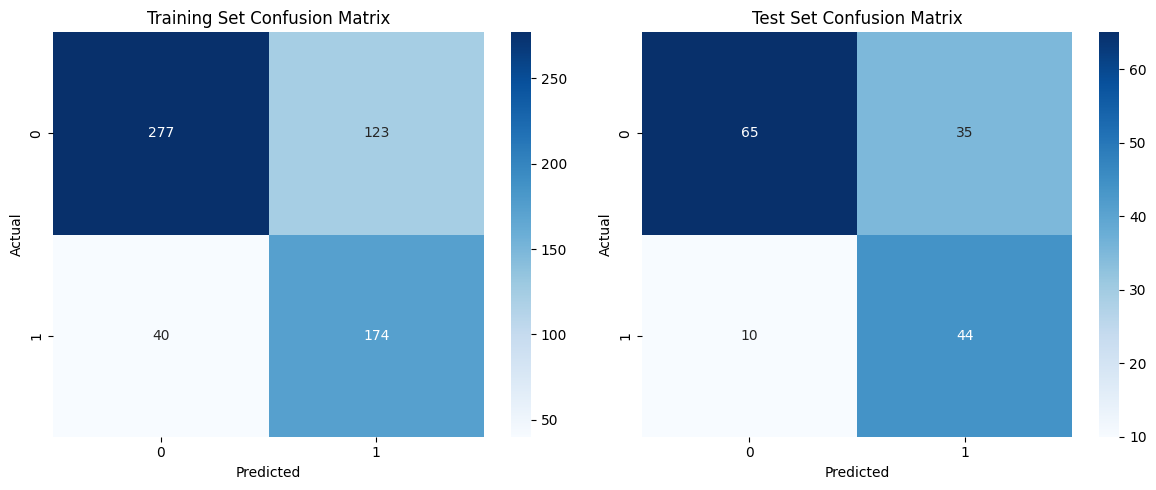

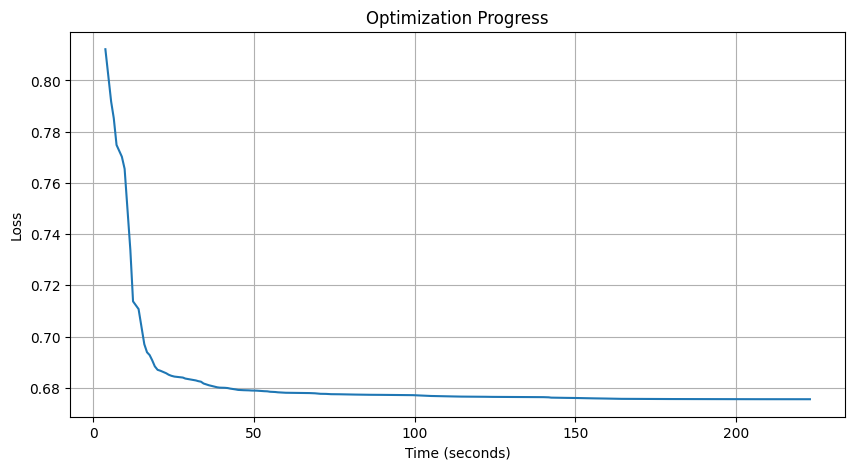

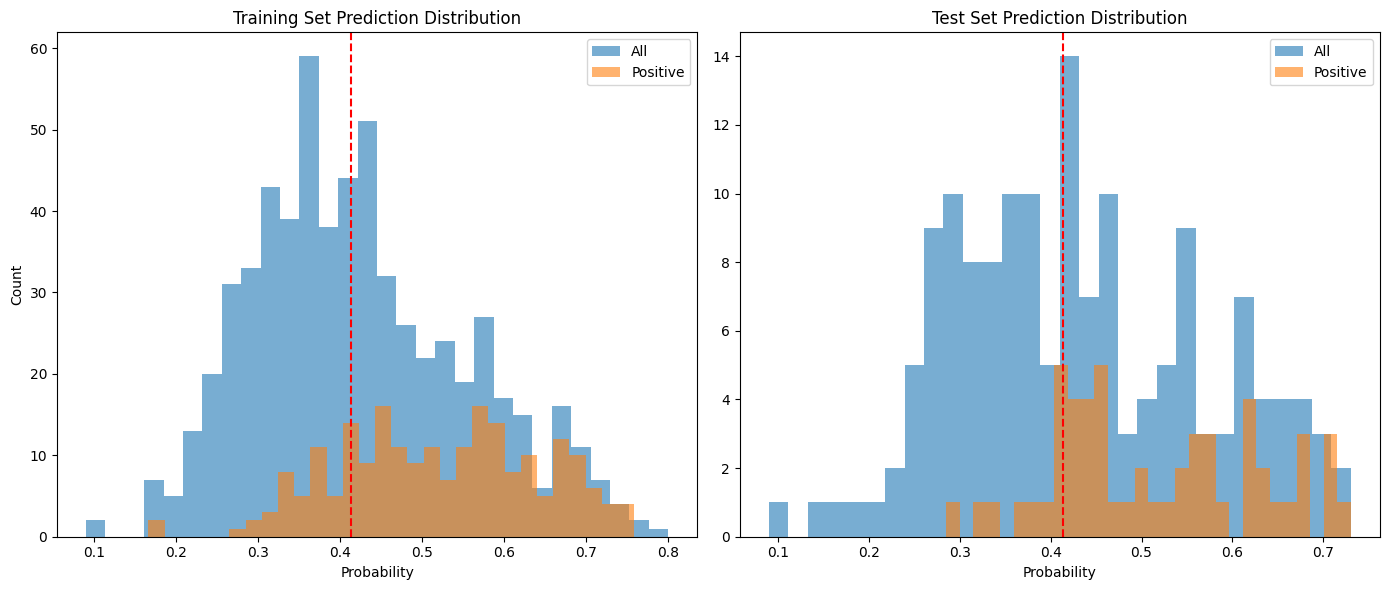

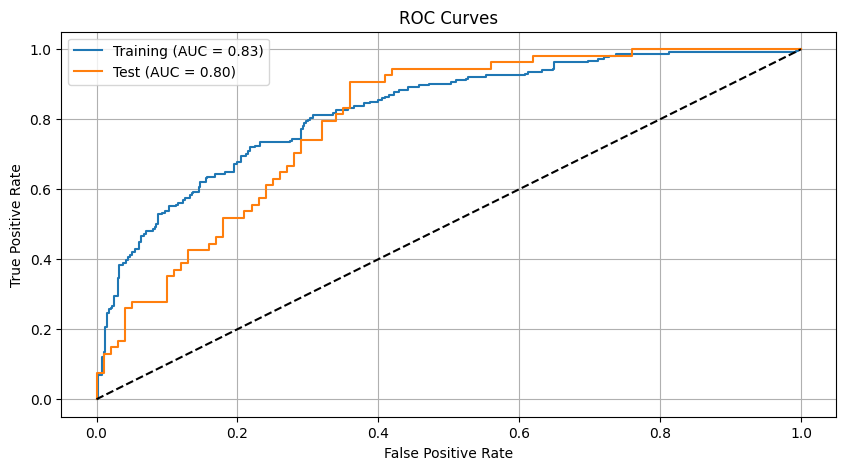

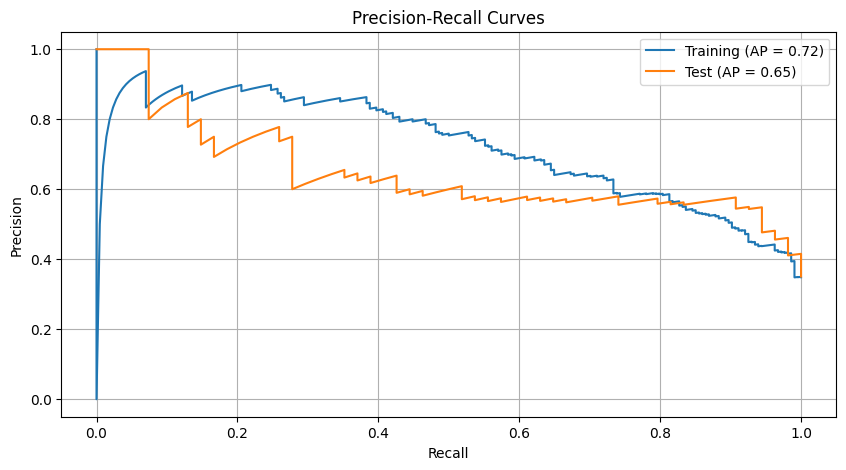

In [25]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from numba import jit
import time
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.metrics import (roc_curve, auc, precision_recall_curve, 
                           average_precision_score, confusion_matrix)
import seaborn as sns

# 1. Enhanced Data Loading and Preparation
def load_and_preprocess_data():
    df = pd.read_csv('diabetes.csv')
    
    # Data quality check
    print("\nData Summary Before Processing:")
    print(df.describe())
    print("\nClass Distribution:")
    print(df['Outcome'].value_counts(normalize=True))
    
    # Separate features and target
    X = df.drop("Outcome", axis=1)
    y = df["Outcome"]
    
    # Apply scaling
    scaler = MinMaxScaler(feature_range=(0, np.pi/2))
    X_scaled = scaler.fit_transform(X)
    
    # Split data with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y)
    
    return X_train, X_test, y_train, y_test, scaler

X_train, X_test, y_train, y_test, scaler = load_and_preprocess_data()

# 2. Quantum Circuit Configuration with Enhanced Parameters
class QuantumCircuitConfig:
    def __init__(self, num_features):
        self.num_layers = 3  # Optimal depth for this dataset
        self.params_per_qubit = 3  # RX, RY, RZ rotations
        self.total_qubits = min(num_features, 6)  # Limit to 6 qubits
        self.total_params = self.total_qubits * self.num_layers * self.params_per_qubit
        self.class_weights = {0: 1.0, 1: 1.5}  # Higher weight for positive class
        
    def initialize_parameters(self):
        np.random.seed(42)
        return np.random.uniform(0, np.pi/2, size=self.total_params).reshape(
            self.num_layers, self.total_qubits, self.params_per_qubit)
    
    def print_config(self):
        print("\nQuantum Circuit Configuration:")
        print(f"- Number of qubits: {self.total_qubits}")
        print(f"- Number of layers: {self.num_layers}")
        print(f"- Parameters per qubit: {self.params_per_qubit}")
        print(f"- Total parameters: {self.total_params}")
        print(f"- Class weights: {self.class_weights}")

config = QuantumCircuitConfig(X_train.shape[1])
config.print_config()
theta = config.initialize_parameters()
X_train_np = X_train[:, :config.total_qubits]
X_test_np = X_test[:, :config.total_qubits]
y_train_np = y_train.values
y_test_np = y_test.values

# 3. Enhanced Quantum Circuit Simulation with Entanglement
@jit(nopython=True)
def quantum_circuit(x, theta, num_qubits, num_layers):
    # Initialize state vector
    state = np.zeros(2**num_qubits, dtype=np.complex128)
    state[0] = 1.0 + 0.0j
    
    # Feature Encoding (RX gates)
    for qubit in range(num_qubits):
        angle = x[qubit]
        for i in range(0, 2**num_qubits, 2**(qubit+1)):
            for j in range(i, i + 2**qubit):
                a = state[j]
                b = state[j + 2**qubit]
                state[j] = np.cos(angle/2)*a - 1j*np.sin(angle/2)*b
                state[j + 2**qubit] = -1j*np.sin(angle/2)*a + np.cos(angle/2)*b
    
    # Variational Layers
    for layer in range(num_layers):
        # Single-qubit rotations
        for qubit in range(num_qubits):
            # RX rotation
            rx_angle = theta[layer, qubit, 0]
            for i in range(0, 2**num_qubits, 2**(qubit+1)):
                for j in range(i, i + 2**qubit):
                    a = state[j]
                    b = state[j + 2**qubit]
                    state[j] = np.cos(rx_angle/2)*a - 1j*np.sin(rx_angle/2)*b
                    state[j + 2**qubit] = -1j*np.sin(rx_angle/2)*a + np.cos(rx_angle/2)*b
            
            # RY rotation
            ry_angle = theta[layer, qubit, 1]
            for i in range(0, 2**num_qubits, 2**(qubit+1)):
                for j in range(i, i + 2**qubit):
                    a = state[j]
                    b = state[j + 2**qubit]
                    state[j] = np.cos(ry_angle/2)*a - np.sin(ry_angle/2)*b
                    state[j + 2**qubit] = np.sin(ry_angle/2)*a + np.cos(ry_angle/2)*b
            
            # RZ rotation
            rz_angle = theta[layer, qubit, 2]
            for i in range(0, 2**num_qubits, 2**(qubit+1)):
                for j in range(i, i + 2**qubit):
                    state[j] *= np.exp(-1j*rz_angle/2)
                    state[j + 2**qubit] *= np.exp(1j*rz_angle/2)
        
        # Entanglement (CNOT gates)
        for qubit in range(num_qubits-1):
            control = qubit
            target = qubit + 1
            for i in range(0, 2**num_qubits, 2**(target+1)):
                for j in range(i, i + 2**target):
                    if (j // 2**control) % 2 == 1:
                        idx1 = j
                        idx2 = j + 2**target
                        state[idx1], state[idx2] = state[idx2], state[idx1]
    
    # Measurement probability of last qubit being |1>
    prob_1 = 0.0
    for i in range(2**num_qubits):
        if (i >> (num_qubits-1)) & 1:
            prob_1 += (state[i].real**2 + state[i].imag**2)
    return prob_1

# 4. Enhanced Cost Function with Regularization
@jit(nopython=True)
def compute_cost(theta_flat, X, y, num_layers, num_qubits, params_per_qubit, pos_weight):
    theta = theta_flat.reshape(num_layers, num_qubits, params_per_qubit)
    total_loss = 0.0
    
    for idx in range(len(X)):
        prob = quantum_circuit(X[idx], theta, num_qubits, num_layers)
        prob = max(min(prob, 0.999), 0.001)  # Numerical stability
        
        if y[idx] == 1:
            total_loss += -pos_weight * np.log(prob)
        else:
            total_loss += -1.0 * np.log(1 - prob)  # Fixed weight of 1.0 for negative class
    
    # L2 regularization
    reg = 0.01 * np.sum(theta**2) / theta.size
    return total_loss / len(X) + reg

def cost_wrapper(theta_flat, X, y, num_layers, num_qubits, params_per_qubit, pos_weight):
    return compute_cost(theta_flat.astype(np.float64), 
                       X.astype(np.float64), 
                       y.astype(np.int64),
                       num_layers, num_qubits, params_per_qubit,
                       pos_weight)

# 5. Modified Optimization
def optimize_parameters():
    # Track optimization progress
    history = {'loss': [], 'time': []}
    start_time = time.time()
    
    def callback(theta_flat):
        loss = cost_wrapper(theta_flat, X_train_np, y_train_np,
                          config.num_layers, config.total_qubits, 
                          config.params_per_qubit, config.pos_weight)
        history['loss'].append(loss)
        history['time'].append(time.time() - start_time)
        if len(history['loss']) % 10 == 0:
            print(f"Iteration {len(history['loss'])}: Loss = {loss:.4f}")
    
    # Run optimization
    result = minimize(
        lambda x: cost_wrapper(x, X_train_np, y_train_np,
                             config.num_layers, config.total_qubits,
                             config.params_per_qubit, config.pos_weight),
        x0=theta.flatten(),
        method='L-BFGS-B',
        bounds=[(0, np.pi/2)] * config.total_params,
        options={'maxiter': 300, 'disp': True},
        callback=callback
    )
    
    return result.x.reshape(theta.shape), history

# Modified QuantumCircuitConfig class
class QuantumCircuitConfig:
    def __init__(self, num_features):
        self.num_layers = 3
        self.params_per_qubit = 3
        self.total_qubits = min(num_features, 6)
        self.total_params = self.total_qubits * self.num_layers * self.params_per_qubit
        self.pos_weight = 1.5  # Single float instead of dictionary
        
    def initialize_parameters(self):
        np.random.seed(42)
        return np.random.uniform(0, np.pi/2, size=self.total_params).reshape(
            self.num_layers, self.total_qubits, self.params_per_qubit)
    
    def print_config(self):
        print("\nQuantum Circuit Configuration:")
        print(f"- Number of qubits: {self.total_qubits}")
        print(f"- Number of layers: {self.num_layers}")
        print(f"- Parameters per qubit: {self.params_per_qubit}")
        print(f"- Total parameters: {self.total_params}")
        print(f"- Positive class weight: {self.pos_weight}")

# Reinitialize config with new class
config = QuantumCircuitConfig(X_train.shape[1])
theta = config.initialize_parameters()

print("\nStarting optimization...")
start_time = time.time()
optimized_theta, opt_history = optimize_parameters()
print(f"Optimization completed in {time.time() - start_time:.2f} seconds")
# 6. Comprehensive Evaluation
class ModelEvaluator:
    def __init__(self, theta, config):
        self.theta = theta
        self.config = config
    
    def predict_proba(self, X):
        return np.array([quantum_circuit(x, self.theta, 
                                       self.config.total_qubits, 
                                       self.config.num_layers) 
                        for x in X[:, :self.config.total_qubits]])
    
    def evaluate(self, X, y, threshold=0.5):
        probs = self.predict_proba(X)
        preds = (probs >= threshold).astype(int)
        
        # Basic metrics
        accuracy = np.mean(preds == y)
        precision = np.sum((preds == 1) & (y == 1)) / np.sum(preds == 1)
        recall = np.sum((preds == 1) & (y == 1)) / np.sum(y == 1)
        f1 = 2 * (precision * recall) / (precision + recall)
        
        # ROC and PR curves
        fpr, tpr, roc_thresholds = roc_curve(y, probs)
        roc_auc = auc(fpr, tpr)
        precision_pr, recall_pr, pr_thresholds = precision_recall_curve(y, probs)
        avg_precision = average_precision_score(y, probs)
        
        return {
            'probs': probs,
            'preds': preds,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'fpr': fpr,
            'tpr': tpr,
            'roc_auc': roc_auc,
            'precision_pr': precision_pr,
            'recall_pr': recall_pr,
            'avg_precision': avg_precision,
            'confusion_matrix': confusion_matrix(y, preds)
        }
    
    def find_optimal_threshold(self, X, y):
        probs = self.predict_proba(X)
        precision, recall, thresholds = precision_recall_curve(y, probs)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
        return thresholds[np.argmax(f1_scores[:len(thresholds)])]

evaluator = ModelEvaluator(optimized_theta, config)
optimal_threshold = evaluator.find_optimal_threshold(X_train_np, y_train_np)
train_results = evaluator.evaluate(X_train_np, y_train_np, optimal_threshold)
test_results = evaluator.evaluate(X_test_np, y_test_np, optimal_threshold)

# 7. Comprehensive Reporting and Visualization
def generate_report(train_results, test_results, opt_history):
    print("\n" + "="*80)
    print("QUANTUM MACHINE LEARNING - DIABETES PREDICTION REPORT".center(80))
    print("="*80)
    
    # 1. Model Configuration
    print("\nMODEL CONFIGURATION:")
    config.print_config()
    print(f"\nTraining time: {opt_history['time'][-1]:.2f} seconds")
    print(f"Number of iterations: {len(opt_history['loss'])}")
    print(f"Final training loss: {opt_history['loss'][-1]:.4f}")
    
    # 2. Performance Summary
    print("\nPERFORMANCE SUMMARY:")
    print("{:<25} {:<15} {:<15}".format("Metric", "Training", "Test"))
    print("-"*55)
    for metric in ['accuracy', 'precision', 'recall', 'f1']:
        print("{:<25} {:<15.2%} {:<15.2%}".format(
            metric.capitalize(),
            train_results[metric],
            test_results[metric]
        ))
    print("\nOptimal threshold: {:.4f}".format(optimal_threshold))
    print("Training ROC AUC: {:.4f}".format(train_results['roc_auc']))
    print("Test ROC AUC: {:.4f}".format(test_results['roc_auc']))
    print("Training Average Precision: {:.4f}".format(train_results['avg_precision']))
    print("Test Average Precision: {:.4f}".format(test_results['avg_precision']))
    
    # 3. Confusion Matrices
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(train_results['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title("Training Set Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    
    plt.subplot(1, 2, 2)
    sns.heatmap(test_results['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title("Test Set Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
    
    # 4. Optimization History
    plt.figure(figsize=(10, 5))
    plt.plot(opt_history['time'], opt_history['loss'])
    plt.xlabel("Time (seconds)")
    plt.ylabel("Loss")
    plt.title("Optimization Progress")
    plt.grid(True)
    plt.show()
    
    # 5. Prediction Distributions
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(train_results['probs'], bins=30, alpha=0.6, label='All')
    plt.hist(train_results['probs'][y_train_np == 1], bins=30, alpha=0.6, label='Positive')
    plt.axvline(optimal_threshold, color='r', linestyle='--')
    plt.title("Training Set Prediction Distribution")
    plt.xlabel("Probability")
    plt.ylabel("Count")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.hist(test_results['probs'], bins=30, alpha=0.6, label='All')
    plt.hist(test_results['probs'][y_test_np == 1], bins=30, alpha=0.6, label='Positive')
    plt.axvline(optimal_threshold, color='r', linestyle='--')
    plt.title("Test Set Prediction Distribution")
    plt.xlabel("Probability")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # 6. ROC Curves
    plt.figure(figsize=(10, 5))
    plt.plot(train_results['fpr'], train_results['tpr'], 
             label=f'Training (AUC = {train_results["roc_auc"]:.2f})')
    plt.plot(test_results['fpr'], test_results['tpr'], 
             label=f'Test (AUC = {test_results["roc_auc"]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 7. Precision-Recall Curves
    plt.figure(figsize=(10, 5))
    plt.plot(train_results['recall_pr'], train_results['precision_pr'],
             label=f'Training (AP = {train_results["avg_precision"]:.2f})')
    plt.plot(test_results['recall_pr'], test_results['precision_pr'],
             label=f'Test (AP = {test_results["avg_precision"]:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')
    plt.legend()
    plt.grid(True)
    plt.show()

generate_report(train_results, test_results, opt_history)

In [26]:
# 2. Detailed Predictions
print("\n" + "-"*40)
print("DETAILED PREDICTIONS".center(40))
print("-"*40)

print("\nTraining Set Predictions (first 20 samples):")
print("{:<10} {:<15} {:<20} {:<15}".format("Index", "True Label", "Raw Prediction", "Class Prediction"))
for i in range(min(20, len(X_train))):
    print("{:<10} {:<15} {:<20.4f} {:<15}".format(
        i, y_train.iloc[i], train_raw[i], 
        "Positive" if train_preds[i] == 1 else "Negative"
    ))
if len(X_train) > 20:
    print(f"... (showing first 20 of {len(X_train)} samples)")

print("\nTest Set Predictions (first 20 samples):")
print("{:<10} {:<15} {:<20} {:<15}".format("Index", "True Label", "Raw Prediction", "Class Prediction"))
for i in range(min(20, len(X_test))):
    print("{:<10} {:<15} {:<20.4f} {:<15}".format(
        i, y_test.iloc[i], test_raw[i],
        "Positive" if test_preds[i] == 1 else "Negative"
    ))
if len(X_test) > 20:
    print(f"... (showing first 20 of {len(X_test)} samples)")



----------------------------------------
          DETAILED PREDICTIONS          
----------------------------------------

Training Set Predictions (first 20 samples):
Index      True Label      Raw Prediction       Class Prediction
0          0               0.4123               Negative       
1          0               0.5019               Positive       
2          0               0.3796               Negative       
3          0               0.4717               Negative       
4          0               0.1790               Negative       
5          1               0.6859               Positive       
6          1               0.5027               Positive       
7          1               0.6852               Positive       
8          0               0.5334               Positive       
9          0               0.5678               Positive       
10         1               0.4659               Negative       
11         0               0.3661               Negative     

      ┌────────────┐ ┌────────────┐ ┌─────────────┐ ┌────────────┐»
q_0: ─┤ Rx(1.7017) ├─┤ Rx(1.0888) ├─┤ Ry(0.98292) ├─┤ Rz(1.5723) ├»
      ├────────────┤ ├────────────┤ └┬────────────┤ ├────────────┤»
q_1: ─┤ Rx(2.7581) ├─┤ Rx(3.4509) ├──┤ Ry(4.4899) ├─┤ Rz(4.1481) ├»
     ┌┴────────────┤ ├────────────┤  ├────────────┤ ├────────────┤»
q_2: ┤ Rx(0.49296) ├─┤ Rx(1.7589) ├──┤ Ry(5.9996) ├─┤ Rz(4.6363) ├»
     ├─────────────┤ ├────────────┤  ├────────────┤ ├────────────┤»
q_3: ┤ Rx(0.15928) ├─┤ Rx(3.4831) ├──┤ Ry(3.8436) ├─┤ Rz(2.6364) ├»
     └┬────────────┤ ├────────────┤  ├────────────┤ ├────────────┤»
q_4: ─┤ Rx(6.0485) ├─┤ Rx(1.5565) ├──┤ Ry(2.2366) ├─┤ Rz(4.7617) ├»
      ├────────────┤┌┴────────────┴┐┌┴────────────┤┌┴────────────┤»
q_5: ─┤ Rx(5.2526) ├┤ Rx(0.090437) ├┤ Ry(0.72931) ├┤ Rz(0.28904) ├»
      ├────────────┤├─────────────┬┘└┬───────────┬┘└┬────────────┤»
q_6: ─┤ Rx(4.3729) ├┤ Rx(0.25591) ├──┤ Ry(5.375) ├──┤ Rz(4.4212) ├»
      ├────────────┤└┬────────────┤ ┌┴──────────

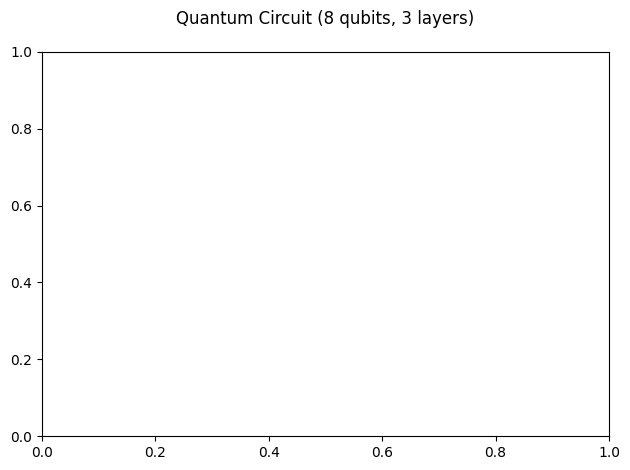

In [45]:
from qiskit import QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt

def build_qiskit_circuit(x, theta, num_qubits, num_layers):
    qc = QuantumCircuit(num_qubits)
    
    # Feature Encoding (RX gates)
    for qubit in range(num_qubits):
        qc.rx(x[qubit], qubit)
    
    # Variational Layers
    for layer in range(num_layers):
        for qubit in range(num_qubits):
            qc.rx(theta[layer, qubit, 0], qubit)
            qc.ry(theta[layer, qubit, 1], qubit)
            qc.rz(theta[layer, qubit, 2], qubit)
        
        # Entanglement using CNOTs
        for qubit in range(num_qubits - 1):
            qc.cx(qubit, qubit + 1)
    
    return qc

# Example parameters
num_qubits = 8
num_layers = 3
x = np.random.rand(num_qubits) * 2 * np.pi
theta = np.random.rand(num_layers, num_qubits, 3) * 2 * np.pi

# Build the circuit
qc = build_qiskit_circuit(x, theta, num_qubits, num_layers)

# Improved visualization
print(qc.draw(output='text', fold=70))

plt.title(f"Quantum Circuit ({num_qubits} qubits, {num_layers} layers)", pad=20)
plt.tight_layout()
plt.show()